# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")  # Ignores all warnings

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file
df = pd.read_parquet('/content/yellow_tripdata_2013-01.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14776617 entries, 0 to 14776616
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             int64         
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   object        
 18  airport_fee         

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/nyc_taxi_data_2023')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        data = pd.read_parquet(file_path)

        #Ensuring the pickup datetime is in proper format
        if 'tpep_pickup_datetime' in data.columns:
            data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
        else:
            raise KeyError("'tpep_pickup_datetime' column not found in the dataset")

        # Creating a column for date and hour
        data['date'] = data['tpep_pickup_datetime'].dt.date
        data['hour'] = data['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in data['date'].unique():
            daily_data = data[data['date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hourly_data = daily_data[daily_data['hour'] == hour]

                # Sample 5% of the hourly data randomly
                sampled_hourly_data = hourly_data.sample(frac=0.05, random_state=42) if not hourly_data.empty else pd.DataFrame()

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sampled_hourly_data], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)  # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Error reading file taxi_zones.shp.xml: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading file taxi_zones.sbx: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading file taxi_zones.prj: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading file taxi_zones.shx: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading file taxi_zones.sbn: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Error reading file taxi_zones.shp: Could not open Parquet input source '<Buf

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
print(len(df))

2501017


Ans : -The merged sampling data for all the months seems to be 2501017 records more than expected therefore sampling it further to keep records at 270,000

In [10]:
if len(df) > 280000:
    df = df.sample(n=280000, random_state=42)  # Keeping record below 300,000 records
elif len(df) < 280000:
    print(f"Warning: The dataset only has {len(df)} records, which is below the expected range.")

In [11]:
# Store the df in csv/parquet
df.to_parquet('/content/drive/MyDrive/nyc_taxi_data_2023/NYC_Yellow_Taxi_Data_2023.parquet',index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [324]:
# Load the new data file
df = pd.read_parquet('/content/drive/MyDrive/nyc_taxi_data_2023/NYC_Yellow_Taxi_Data_2023.parquet')

In [325]:
# Display Few Reocrds of the df.
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2013-01-29 15:58:57   2013-01-29 16:02:06              1.0   
1         2  2023-06-29 11:47:05   2023-06-29 12:03:41              1.0   
2         2  2023-08-12 09:49:38   2023-08-12 09:56:10              1.0   
3         2  2023-12-27 21:50:17   2023-12-27 21:56:39              1.0   
4         2  2023-04-02 00:17:58   2023-04-02 00:23:12              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.50         1.0                  N           162           141   
1           1.21         1.0                  N           164           161   
2           1.08         1.0                  N           142            43   
3           1.44         1.0                  N           237           263   
4           0.81         1.0                  N           161            48   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        3.78           0.0   
2             1  ...      0.5        1.89           0.0   
3             1  ...      0.5        3.40           0.0   
4             1  ...      0.5        2.44           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    0.0          6.00                   NaN         None   
1                    1.0         22.68                   2.5         None   
2                    1.0         14.49                   2.5         None   
3                    1.0         17.00                   2.5         None   
4                    1.0         14.64                   2.5         None   

         date hour Airport_fee  
0  2013-01-29   15         NaN  
1  2023-06-29   11         0.0  
2  2023-08-12    9         0.0  
3  2023-12-27   21         0.0  
4  2023-04-02    0         0.0  

[5 rows x 22 columns]

In [326]:
# Display columns Structure of df with each column data type and value counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280000 entries, 0 to 279999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               280000 non-null  int64         
 1   tpep_pickup_datetime   280000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  280000 non-null  datetime64[us]
 3   passenger_count        273085 non-null  float64       
 4   trip_distance          280000 non-null  float64       
 5   RatecodeID             273085 non-null  float64       
 6   store_and_fwd_flag     231833 non-null  object        
 7   PULocationID           280000 non-null  int64         
 8   DOLocationID           280000 non-null  int64         
 9   payment_type           280000 non-null  int64         
 10  fare_amount            280000 non-null  float64       
 11  extra                  280000 non-null  float64       
 12  mta_tax                280000 non-null  floa

In [327]:
df.shape

(280000, 22)

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [328]:
# Fix the index and drop any columns that are not needed
#Droping unnecessary columns
columns_to_drop = ['store_and_fwd_flag', 'improvement_surcharge','hour','date','mta_tax','tolls_amount']

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

#Reseting the index
df.reset_index(drop=True, inplace=True)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [329]:
# Combine the two airport fee columns
df['Airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])

df.drop(columns=['airport_fee'], inplace=True)

In [330]:
df['Airport_fee'].isna().sum()

89571

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280000 entries, 0 to 279999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               280000 non-null  int64         
 1   tpep_pickup_datetime   280000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  280000 non-null  datetime64[us]
 3   passenger_count        273085 non-null  float64       
 4   trip_distance          280000 non-null  float64       
 5   RatecodeID             273085 non-null  float64       
 6   PULocationID           280000 non-null  int64         
 7   DOLocationID           280000 non-null  int64         
 8   payment_type           280000 non-null  int64         
 9   fare_amount            280000 non-null  float64       
 10  extra                  280000 non-null  float64       
 11  tip_amount             280000 non-null  float64       
 12  total_amount           280000 non-null  floa

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [332]:
# check where values of fare amount are negative
negative_fare_amount = df[df['fare_amount'] < 0]

negative_fare_amount

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
20             2  2023-05-14 16:55:22   2023-05-14 17:32:05              3.0   
195            2  2023-04-19 16:24:26   2023-04-19 16:31:38              1.0   
281            2  2023-09-18 22:50:05   2023-09-18 23:00:58              1.0   
403            2  2023-10-21 07:39:02   2023-10-21 07:46:32              1.0   
541            2  2023-12-15 00:29:25   2023-12-15 00:42:42              1.0   
...          ...                  ...                   ...              ...   
279066         2  2023-06-01 06:44:32   2023-06-01 06:49:08              1.0   
279124         2  2023-08-10 18:58:18   2023-08-10 19:10:23              1.0   
279323         2  2023-08-13 02:38:03   2023-08-13 02:41:11              1.0   
279377         2  2023-12-28 13:00:09   2023-12-28 13:09:19              1.0   
279578         2  2023-04-21 12:44:42   2023-04-21 13:00:14              1.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
20              13.19         1.0            70           261             4   
195              0.44         1.0           162           162             2   
281              1.15         1.0           161           100             4   
403              2.44         1.0           237           186             2   
541              4.80         1.0           132            10             4   
...               ...         ...           ...           ...           ...   
279066           1.37         1.0            48           246             4   
279124           1.31         1.0            68           107             4   
279323           0.50         1.0           148            79             2   
279377           1.20         1.0           238           142             2   
279578           2.50         1.0           100           144             4   

        fare_amount  extra  tip_amount  total_amount  congestion_surcharge  \
20            -55.5    0.0         0.0        -64.50                  -2.5   
195            -7.9   -2.5         0.0        -14.40                  -2.5   
281           -11.4   -1.0         0.0        -16.40                  -2.5   
403           -12.8    0.0         0.0        -16.80                  -2.5   
541           -21.9   -1.0         0.0        -26.15                   0.0   
...             ...    ...         ...           ...                   ...   
279066         -7.9    0.0         0.0        -11.90                  -2.5   
279124        -12.1   -2.5         0.0        -18.60                  -2.5   
279323         -5.1   -1.0         0.0        -10.10                  -2.5   
279377        -10.0    0.0         0.0        -14.00                  -2.5   
279578        -16.3    0.0         0.0        -20.30                  -2.5   

        Airport_fee  
20             0.00  
195            0.00  
281            0.00  
403            0.00  
541           -1.75  
...             ...  
279066         0.00  
279124         0.00  
279323         0.00  
279377         0.00  
279578         0.00  

[1933 rows x 15 columns]

[link text](https://)Did you notice something different in the `RatecodeID` column for above records?

Ans : - Noticed that most of the RadecodeID has value 1 which represents standard rate applied at each end of the trip

In [333]:
# Analyse RatecodeID for the negative fare amounts
ratecodeid = negative_fare_amount['RatecodeID']

ratecodeid.value_counts()

RatecodeID
1.0    1684
2.0     138
3.0      29
5.0      27
4.0      13
Name: count, dtype: int64

In [334]:
# Find which columns have negative values

numeric_df = df.select_dtypes(include=['number'])

negative_columns = numeric_df.columns[(numeric_df < 0).any()]

negative_columns

Index(['fare_amount', 'extra', 'tip_amount', 'total_amount',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [335]:
# fix these negative values
#Taking the absolute values so that data is not distorted.
df[negative_columns] = df[negative_columns].abs()

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [336]:
# Find the proportion of missing values in each column

missing_proportion = df.isnull().mean()

missing_proportion

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.024696
trip_distance            0.000000
RatecodeID               0.024696
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
tip_amount               0.000000
total_amount             0.000000
congestion_surcharge     0.319896
Airport_fee              0.319896
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [337]:
# Display the rows with null values
# rows_with_nulls = df[df.isna().any(axis=1)]
# rows_with_nulls

#Display rows where passenger count is null
missing_passenger_rows = df[df['passenger_count'].isnull()]
missing_passenger_rows

# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)

Did you find zeroes in passenger_count? Handle these.

In [338]:
df['passenger_count'].value_counts()

passenger_count
1.0    208886
2.0     39795
3.0     10430
5.0      7534
4.0      5652
6.0      4712
0.0      2990
8.0         1
Name: count, dtype: int64

In [339]:
# Replacing 0 passenger count with 1 since it seems to be error having zero passenger count and there is trip distance present for it.
df['passenger_count'].replace(0, 1, inplace=True)

In [340]:
df['passenger_count'].value_counts()

passenger_count
1.0    211876
2.0     39795
3.0     10430
5.0      7534
4.0      5652
6.0      4712
8.0         1
Name: count, dtype: int64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [341]:
# Fix missing values in 'RatecodeID'

# Imputing RatecodeID having missing values with mode operation.
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)

In [342]:
df['RatecodeID'].isna().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [343]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].isna().sum()

#In NYC taxi data, most rides inside congestion zones have a fixed charge of $2.50
df['congestion_surcharge'].fillna(2.50, inplace=True)

In [344]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    265015
0.0     14985
Name: count, dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [345]:
#Finding columns with missing values
missing_counts = df.isna().sum()
missing_counts[missing_counts > 0]

Airport_fee    89571
dtype: int64

In [346]:
# Handle any remaining missing values

# Handling missing counts in Airport_fee column
airport_locations = [132, 138]  # JFK & LaGuardia

df['Airport_fee'] = df.apply(
    lambda row: 1.25 if (pd.isna(row['Airport_fee']) and row['PULocationID'] in airport_locations)
    else 0 if pd.isna(row['Airport_fee']) else row['Airport_fee'],
    axis=1
)

In [347]:
df['Airport_fee'].value_counts()

Airport_fee
0.00    260301
1.75     13721
1.25      5978
Name: count, dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [348]:
# Describe the data and check if there are any potential outliers present
df.describe()

# Check for potential out of place values in various columns
df.info()

# df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280000 entries, 0 to 279999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               280000 non-null  int64         
 1   tpep_pickup_datetime   280000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  280000 non-null  datetime64[us]
 3   passenger_count        280000 non-null  float64       
 4   trip_distance          280000 non-null  float64       
 5   RatecodeID             280000 non-null  float64       
 6   PULocationID           280000 non-null  int64         
 7   DOLocationID           280000 non-null  int64         
 8   payment_type           280000 non-null  int64         
 9   fare_amount            280000 non-null  float64       
 10  extra                  280000 non-null  float64       
 11  tip_amount             280000 non-null  float64       
 12  total_amount           280000 non-null  floa

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [349]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [354]:
# Continue with outlier handling
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] <= 300)]  # Remove negative or zero fares

df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

df = df[df['trip_distance'] <= 250] # Ensuring trip distance to be less than 250 miles.

most_common_payment = df['payment_type'].mode()[0]   #Entries where payment type is replacing it with most common payment type.
df['payment_type'] = df['payment_type'].replace(0, most_common_payment)

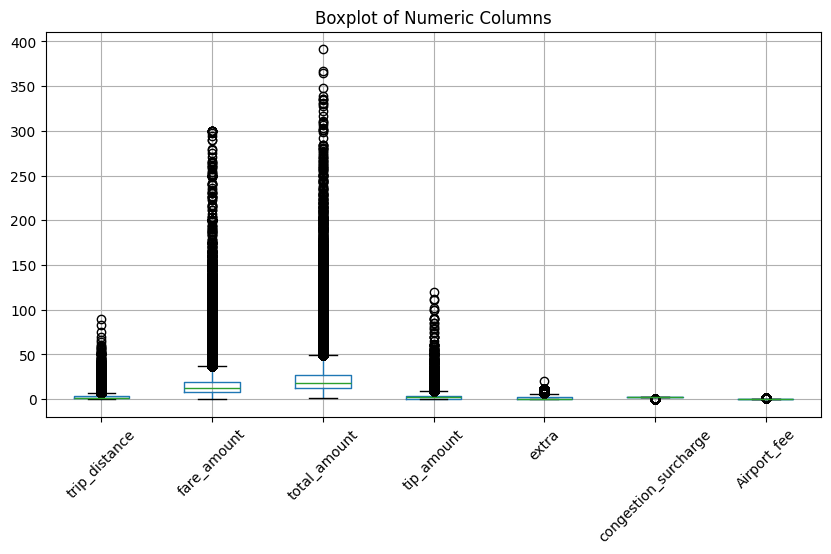

In [355]:
# Do any columns need standardising?

# Other columns seems to be fine for now so no need of standardization.

#checking for outliers using box plot
numeric_cols = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount','extra', 'congestion_surcharge', 'Airport_fee']

plt.figure(figsize=(10, 5))
df[numeric_cols].boxplot(rot=45)
plt.title("Boxplot of Numeric Columns")
plt.show()


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [356]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'tip_amount',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [357]:
# Identifing numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Manually adding categorical variables that are stored as numbers
categorical_cols += ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'pickup_hour']

# Removing manually assigned categorical columns from numerical list
numerical_cols = [col for col in numerical_cols if col not in categorical_cols]

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'tip_amount', 'total_amount', 'congestion_surcharge', 'Airport_fee']
Categorical Columns: ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'pickup_hour']


##### Temporal Analysis

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279913 entries, 0 to 279999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               279913 non-null  int64         
 1   tpep_pickup_datetime   279913 non-null  datetime64[us]
 2   tpep_dropoff_datetime  279913 non-null  datetime64[us]
 3   passenger_count        279913 non-null  float64       
 4   trip_distance          279913 non-null  float64       
 5   RatecodeID             279913 non-null  float64       
 6   PULocationID           279913 non-null  int64         
 7   DOLocationID           279913 non-null  int64         
 8   payment_type           279913 non-null  int64         
 9   fare_amount            279913 non-null  float64       
 10  extra                  279913 non-null  float64       
 11  tip_amount             279913 non-null  float64       
 12  total_amount           279913 non-null  float64  

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [359]:
# Find and show the hourly trends in taxi pickups

# Getting hour from tpep_pickup_datetime column
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour

# This will provide the counts for number of pickups per hour.
hourly_pickups = df['pickup_hour'].value_counts().sort_index()

hourly_pickups

pickup_hour
0      8578
1      5996
2      4251
3      2931
4      2089
5      1954
6      4479
7      8452
8     11339
9     12355
10    12868
11    13599
12    14673
13    14976
14    16083
15    16379
16    15704
17    17645
18    19166
19    17632
20    15936
21    15813
22    14946
23    12069
Name: count, dtype: int64

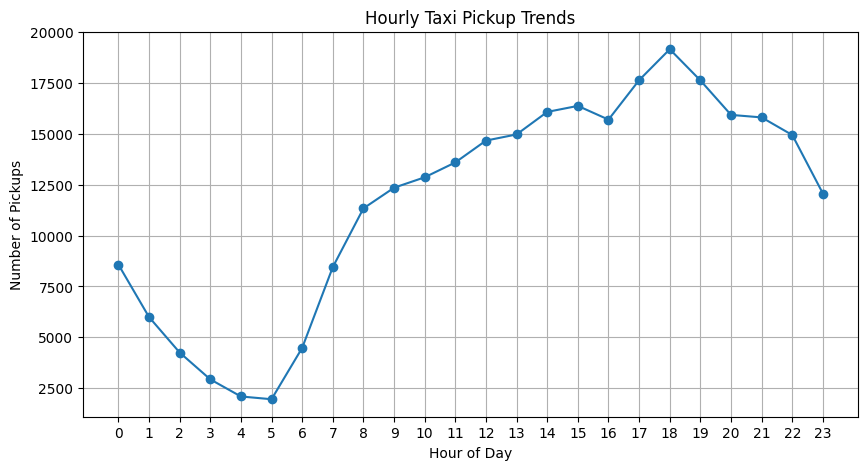

In [360]:
plt.figure(figsize=(10,5))
plt.plot(hourly_pickups.index, hourly_pickups.values, marker='o', linestyle='-')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Taxi Pickup Trends")
plt.xticks(range(0, 24))  # Ensuring all hours are shown
plt.grid()

#saving the image
plt.savefig("/content/drive/MyDrive/nyc_taxi_data_2023/NYC_Records_Graphs/hourly_taxi_pickups.png", dpi=300)


plt.show()

Obervation :- This shows that maximum pickups are done at 17-19 hrs (i.e 5pm-7pm in the Evenings)

In [361]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.dayofweek

# This counts the number of pickups for each day (Monday-Sunday).
daily_pickups = df['pickup_day'].value_counts().sort_index()

# Mapping Day Numbers to Day Names for better understaing in plot.
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_pickups.index = [days[i] for i in daily_pickups.index]


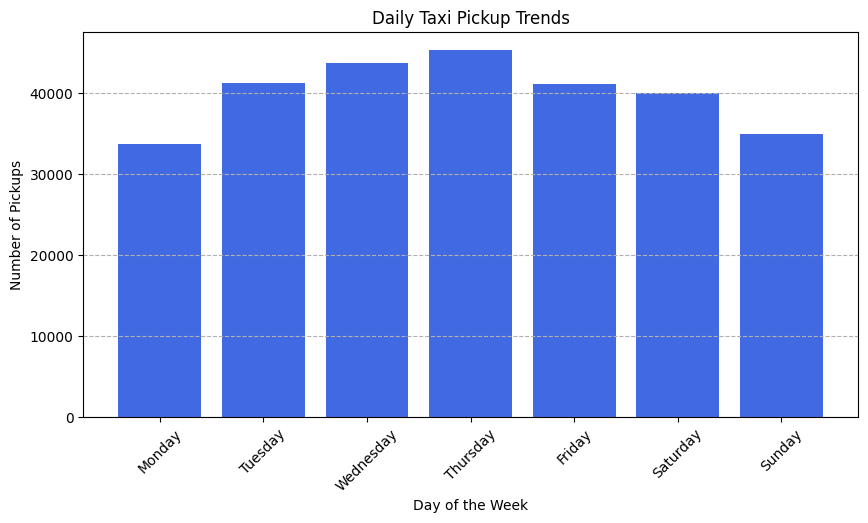

In [362]:
plt.figure(figsize=(10, 5))
plt.bar(daily_pickups.index, daily_pickups.values, color='royalblue')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("Daily Taxi Pickup Trends")
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(axis='y', linestyle='--')

# Saving the figure
plt.savefig("/content/drive/MyDrive/nyc_taxi_data_2023/NYC_Records_Graphs/daily_taxi_pickups.png", dpi=300, bbox_inches='tight')

plt.show()

Observation : - Maximum pickups are seen on thursday from 2023 NYC taxi records

In [363]:
# Show the monthly trends in pickups
df['pickup_month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month

# This counts the number of pickups for each month (JAN-DEC).
monthly_pickups = df['pickup_month'].value_counts().sort_index()

months = ["January", "February", "March", "April", "May", "Jun", "July","August","September","Octomber","November","December"]
monthly_pickups.index = [months[i-1] for i in monthly_pickups.index]

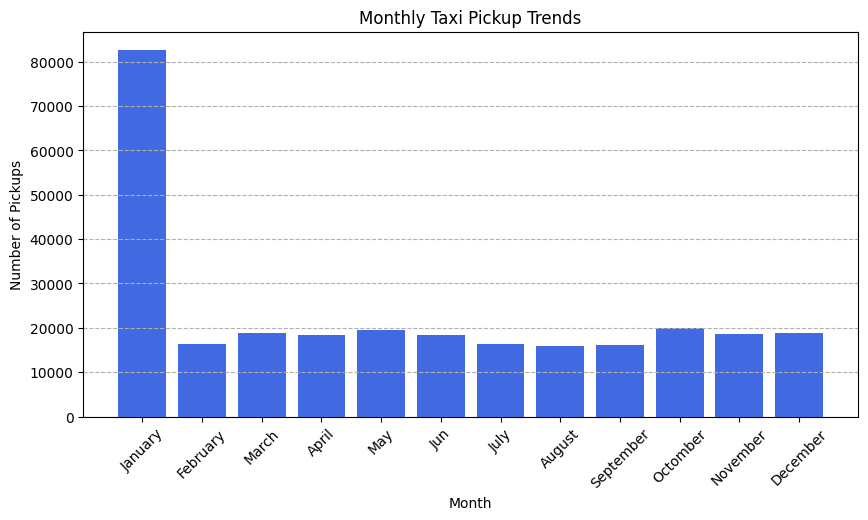

In [364]:
plt.figure(figsize=(10, 5))
plt.bar(monthly_pickups.index, monthly_pickups.values, color='royalblue')
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Taxi Pickup Trends")
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(axis='y', linestyle='--')

# Saving the figure
plt.savefig("/content/drive/MyDrive/nyc_taxi_data_2023/NYC_Records_Graphs/monthly_taxi_pickups.png", dpi=300, bbox_inches='tight')

plt.show()

Obervation : - The large spike seen in January month could be due to after new year people using taxi's a lot for travelling.

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [365]:
# Analyse the above parameters

# Creating list of financial parameters & trip distance to check
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Checking for zero or negative values
zero_negative_values = df[columns_to_check].apply(lambda x: (x <= 0).sum())

print("Count of zero/negative values per column:")
print(zero_negative_values)

Count of zero/negative values per column:
fare_amount          0
tip_amount       87403
total_amount         0
trip_distance     4585
dtype: int64


*Do* you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Observation :- Yes, since having zero values in the selected columns seems to be mistake. If taxi is used then there should be trip_distance or fare_amount otherwise it seems the person has not travelled at all.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [366]:
# Count of zero values in selected columns
zero_counts = (df[['trip_distance', 'fare_amount', 'tip_amount','total_amount']] == 0).sum()
print(zero_counts)


trip_distance     4585
fare_amount          0
tip_amount       87403
total_amount         0
dtype: int64


In [367]:
# Create a df with non zero entries for the selected parameters.

df_filtered = df[(df['fare_amount'] > 0) & (df['total_amount'] > 0)].copy() #Removing Zero fare and Zero total rows

# Keeping zero trip_distance only if the fare is valid
df_filtered = df_filtered[(df_filtered['trip_distance'] > 0) | (df_filtered['total_amount'] > 0)].copy()

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [368]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279913 entries, 0 to 279999
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               279913 non-null  int64         
 1   tpep_pickup_datetime   279913 non-null  datetime64[us]
 2   tpep_dropoff_datetime  279913 non-null  datetime64[us]
 3   passenger_count        279913 non-null  float64       
 4   trip_distance          279913 non-null  float64       
 5   RatecodeID             279913 non-null  float64       
 6   PULocationID           279913 non-null  int64         
 7   DOLocationID           279913 non-null  int64         
 8   payment_type           279913 non-null  int64         
 9   fare_amount            279913 non-null  float64       
 10  extra                  279913 non-null  float64       
 11  tip_amount             279913 non-null  float64       
 12  total_amount           279913 non-null  float64  

In [369]:
# Group data by month and analyse monthly revenue
df_filtered['pickup_month'] = df_filtered['tpep_pickup_datetime'].dt.month
df_filtered['month_name'] = df_filtered['tpep_pickup_datetime'].dt.strftime('%B')

# Grouping by month and calculate total revenue
monthly_revenue = df_filtered.groupby(['pickup_month', 'month_name'])['total_amount'].sum().reset_index()

# Sorting months correctly
monthly_revenue = monthly_revenue.sort_values(by='pickup_month')

print(monthly_revenue)

    pickup_month month_name  total_amount
0              1    January    1155927.41
1              2   February     446287.36
2              3      March     531693.34
3              4      April     529661.93
4              5        May     571046.88
5              6       June     542388.45
6              7       July     467357.30
7              8     August     458280.23
8              9  September     485175.38
9             10    October     587625.76
10            11   November     537260.65
11            12   December     548707.74


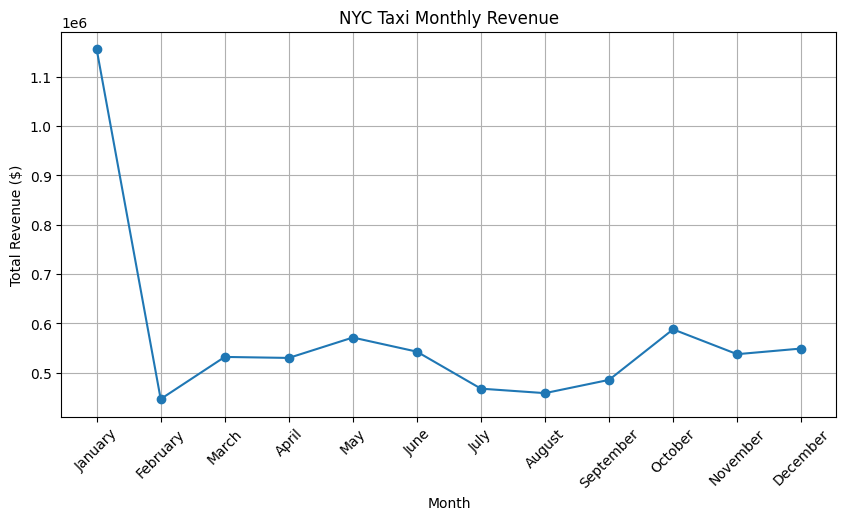

In [370]:
# Line Plot for Monthly Revenue
plt.figure(figsize=(10,5))
plt.plot(monthly_revenue['month_name'], monthly_revenue['total_amount'], marker='o', linestyle='-')

plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("NYC Taxi Monthly Revenue")
plt.xticks(rotation=45)
plt.grid(True)

plt.savefig("/content/drive/MyDrive/nyc_taxi_data_2023/NYC_Records_Graphs/monthly_revenue_by_month.png", dpi=300)

plt.show()

Obervation : In Temporal Anlalysis we  have seen large count of Pickup in january therefore we can see here the revenue generated large too.

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [371]:
# Calculate proportion of each quarter

# Extracting quarter from tpep_pickup_datetime
df_filtered['quarter'] = df_filtered['tpep_pickup_datetime'].dt.quarter

# Grouping by quarter and calculate total revenue
quarterly_revenue = df_filtered.groupby('quarter')['total_amount'].sum().reset_index()

# Calculating proportion of revenue for each quater
quarterly_revenue['revenue_proportion'] = (quarterly_revenue['total_amount'] / quarterly_revenue['total_amount'].sum()) * 100


print(quarterly_revenue)

   quarter  total_amount  revenue_proportion
0        1    2133908.11           31.100129
1        2    1643097.26           23.946925
2        3    1410812.91           20.561552
3        4    1673594.15           24.391394


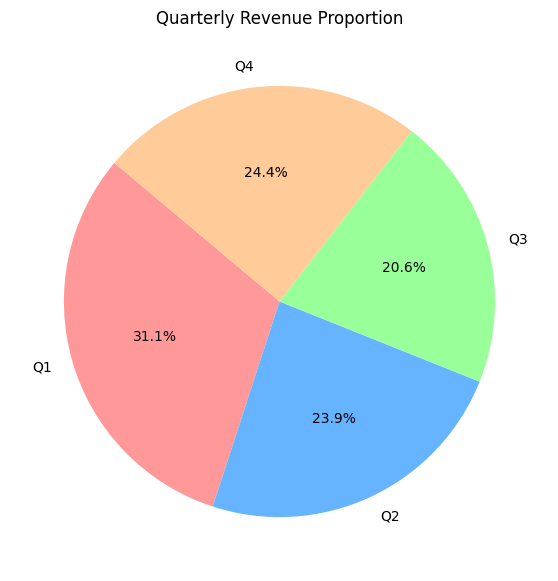

In [372]:
# Pie chart of revenue proportion per quarter
plt.figure(figsize=(7, 7))
plt.pie(
    quarterly_revenue['revenue_proportion'],
    labels=[f"Q{i}" for i in quarterly_revenue['quarter']],
    autopct='%1.1f%%',
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'],
    startangle=140
)

plt.title("Quarterly Revenue Proportion")

plt.savefig("/content/drive/MyDrive/nyc_taxi_data_2023/NYC_Records_Graphs/reveue_proportion.png", dpi=300)

plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

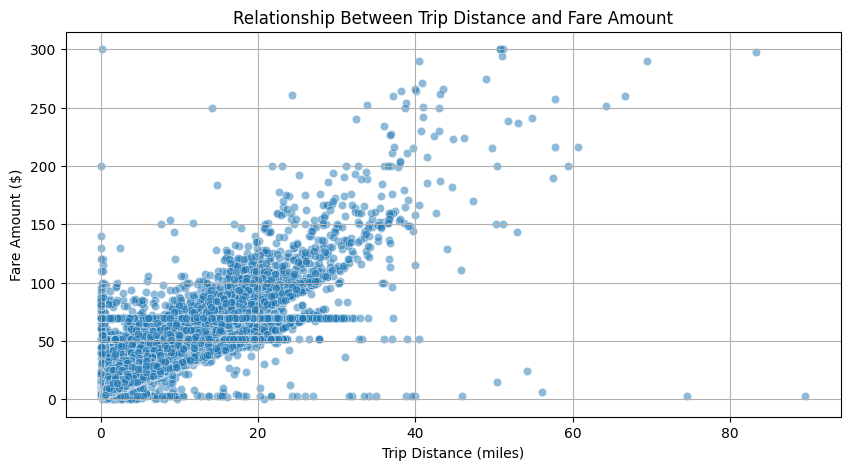

In [373]:
# Show how trip fare is affected by distance

# Remove zero-distance trips if there any
df_filtered = df[df['trip_distance'] > 0]

# Scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_filtered['trip_distance'], y=df_filtered['fare_amount'], alpha=0.5)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship Between Trip Distance and Fare Amount")
plt.grid(True)

plt.savefig("/content/drive/MyDrive/nyc_taxi_data_2023/NYC_Records_Graphs/trip_distance_vs_fare_amount.png", dpi=300)

plt.show()

In [374]:
#  Calculating Correlation Value
correlation = df_filtered['trip_distance'].corr(df_filtered['fare_amount'])
print(f"Correlation between Trip Distance and Fare Amount: {correlation:.4f}")

Correlation between Trip Distance and Fare Amount: 0.9258


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [375]:
# Show relationship between fare and trip duration

# Calculate trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Remove trips with zero or negative duration
df_filtered = df[df['trip_duration'] > 0]

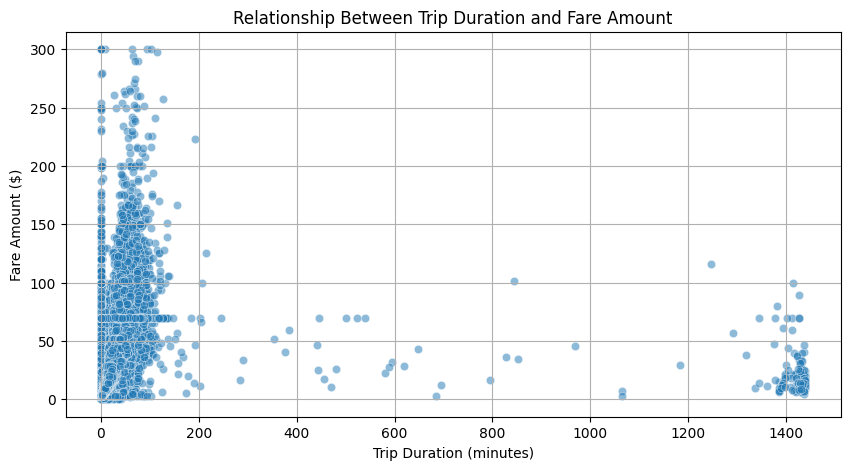

In [376]:
plt.figure(figsize=(10,5))

# Scatter plot
sns.scatterplot(x=df_filtered['trip_duration'], y=df_filtered['fare_amount'], alpha=0.5)

# Formatting
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship Between Trip Duration and Fare Amount")
plt.grid(True)

plt.savefig("/content/drive/MyDrive/nyc_taxi_data_2023/NYC_Records_Graphs/fareamount_vs_tripduration.png", dpi=300)

plt.show()

In [377]:
correlation = df_filtered['trip_duration'].corr(df_filtered['fare_amount'])
print(f"Correlation between Trip Duration and Fare Amount: {correlation:.4f}")

Correlation between Trip Duration and Fare Amount: 0.3064


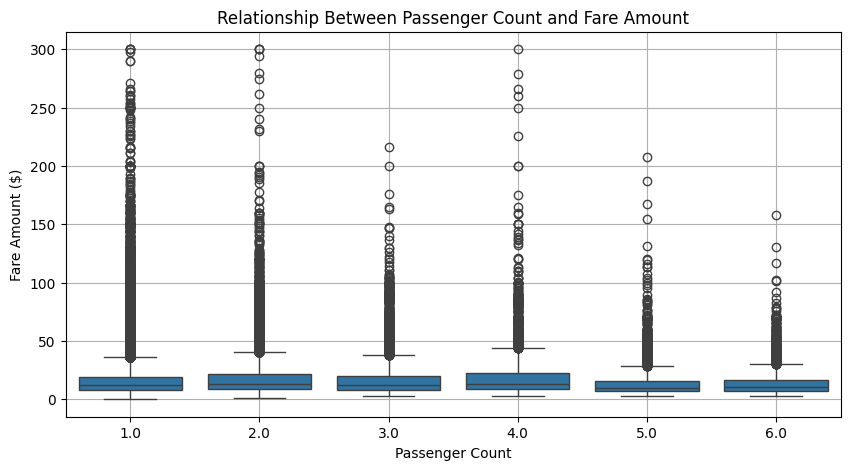

In [378]:
# Show relationship between fare and number of passengers
df_filtered = df[df['passenger_count'] > 0]

plt.figure(figsize=(10, 5))

# Boxplot to show fare distribution for different passenger counts
sns.boxplot(x=df_filtered['passenger_count'], y=df_filtered['fare_amount'])
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship Between Passenger Count and Fare Amount")
plt.grid(True)

plt.savefig("/content/drive/MyDrive/nyc_taxi_data_2023/NYC_Records_Graphs/fareamount_vs_passenfercount.png", dpi=300)


plt.show()

In [379]:
correlation = df_filtered['passenger_count'].corr(df_filtered['fare_amount'])
print(f"Correlation between Passenger Count and Fare Amount: {correlation:.4f}")

Correlation between Passenger Count and Fare Amount: -0.0012


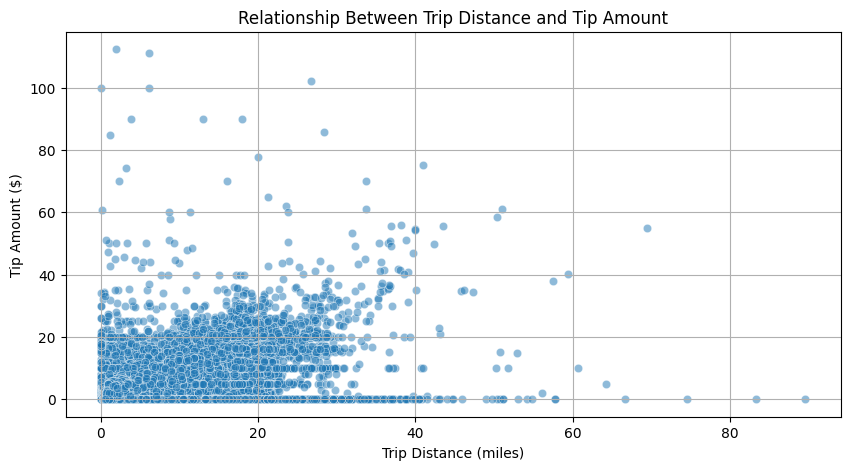

In [380]:
# Show relationship between tip and trip distance

df_filtered = df[df['trip_distance'] > 0]

plt.figure(figsize=(10, 5))

# Scatter plot
sns.scatterplot(x=df_filtered['trip_distance'], y=df_filtered['tip_amount'], alpha=0.5)

plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.title("Relationship Between Trip Distance and Tip Amount")
plt.grid(True)


plt.savefig("/content/drive/MyDrive/nyc_taxi_data_2023/NYC_Records_Graphs/tip_vs_tripdistance", dpi=300)

# Show plot
plt.show()


In [381]:
correlation = df_filtered['trip_distance'].corr(df_filtered['tip_amount'])
print(f"Correlation between Trip Distance and Tip Amount: {correlation:.4f}")

Correlation between Trip Distance and Tip Amount: 0.5645


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [382]:
# Analyse the distribution of different payment types (payment_type).

# Counting occurrences of each payment type
payment_counts = df['payment_type'].value_counts()

payment_counts

payment_type
1    203951
2     71854
4      2656
3      1417
5        35
Name: count, dtype: int64

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



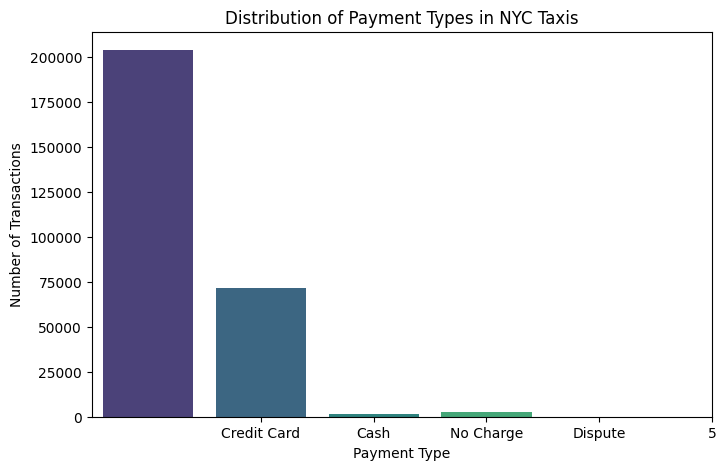

In [383]:
# Mapping pyment type which is in number to its actual reference for better understanding in plot.
payment_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute"
}

# Count occurrences of each payment type
payment_counts = df['payment_type'].value_counts()

plt.figure(figsize=(8, 5))

# Bar plot
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")

# Replacing x-axis labels with mapped values
plt.xticks(ticks=payment_counts.index, labels=[payment_mapping.get(i, i) for i in payment_counts.index])

plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Payment Types in NYC Taxis")


plt.savefig("/content/drive/MyDrive/nyc_taxi_data_2023/NYC_Records_Graphs/payment_distribution", dpi=300)

plt.show()

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [384]:
!pip install geopandas --quiet

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [385]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/nyc_taxi_data_2023/Taxi Zones/taxi_zones.shp')# read the .shp file using gpd

zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

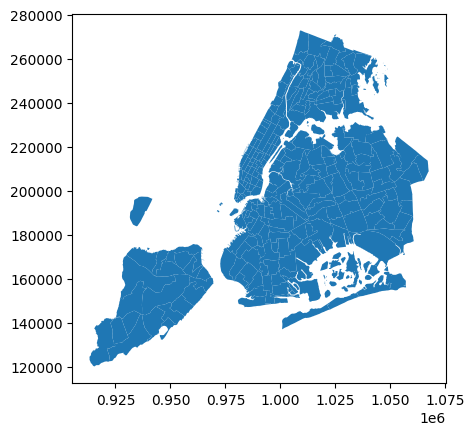

In [386]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [387]:
# Merge zones and trip records using locationID and PULocationID

# Checking if both columns are of the same type
df_filtered['PULocationID'] = df_filtered['PULocationID'].astype(int)
zones['LocationID'] = zones['LocationID'].astype(int)

# Merging trip data with zones data based on PULocationID
df_merged = df_filtered.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [388]:
# Group data by location and calculate the number of trips

# Count trips for each pickup location
pickup_counts = df_filtered.groupby("PULocationID").size().reset_index(name="pickup_trips")

# Count trips for each drop-off location
dropoff_counts = df_filtered.groupby("DOLocationID").size().reset_index(name="dropoff_trips")

# Merge both pickup and drop-off counts on LocationID
total_trips = pickup_counts.merge(dropoff_counts,
                                  left_on="PULocationID",
                                  right_on="DOLocationID",
                                  how="outer").fillna(0)

# Rename columns
total_trips.rename(columns={"PULocationID": "LocationID"}, inplace=True)

# Sum up total trips (pickup + dropoff)
total_trips["total_trips"] = total_trips["pickup_trips"] + total_trips["dropoff_trips"]

# Keep only relevant columns
total_trips = total_trips[["LocationID", "pickup_trips", "dropoff_trips", "total_trips"]]

# Display top locations
total_trips.sort_values(by="total_trips", ascending=False).head()


LocationID  pickup_trips  dropoff_trips  total_trips
229       237.0       12215.0          11115      23330.0
154       161.0       11855.0          10909      22764.0
228       236.0       11080.0          11409      22489.0
222       230.0        9267.0           8649      17916.0
155       162.0        9663.0           8055      17718.0

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [389]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(total_trips, on="LocationID", how="left")

# Fill missing values (if some zones have no trips)
zones["total_trips"] = zones["total_trips"].fillna(0)

# show first few rows
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   pickup_trips  dropoff_trips  total_trips  
0           8.0          703.0        711.0  
1           NaN            NaN          0.0  
2           3.0           22.0         25.0  
3         481.0         1078.0       1559.0  
4           2.0            2.0          4.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

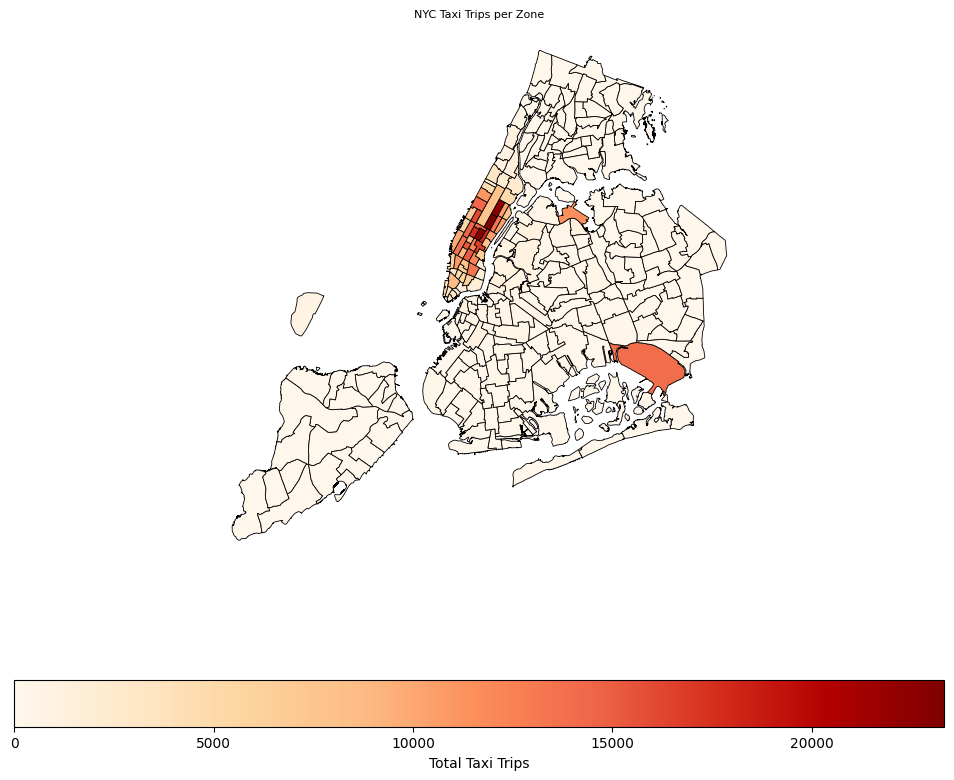

In [390]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot(
    column="total_trips",
    cmap="OrRd",
    linewidth=0.6,
    edgecolor="black",
    legend=True,
    legend_kwds={'label': "Total Taxi Trips", 'orientation': "horizontal"},
    ax=ax
)

plt.title("NYC Taxi Trips per Zone", fontsize=8)

# Hiding axis labels for better visualization
ax.set_axis_off()


plt.savefig('/content/drive/MyDrive/nyc_taxi_data_2023/NYC_Records_Graphs/color_coded_map_zones.png',dpi=300)

plt.show()

In [391]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort zones by total trips in descending order
zones_sorted = zones.sort_values(by="total_trips", ascending=False)

# Display the top 10 zones with the most trips
zones_sorted[["zone", "borough", "total_trips"]].head(10)

zone    borough  total_trips
236         Upper East Side South  Manhattan      23330.0
160                Midtown Center  Manhattan      22764.0
235         Upper East Side North  Manhattan      22489.0
229     Times Sq/Theatre District  Manhattan      17916.0
161                  Midtown East  Manhattan      17718.0
169                   Murray Hill  Manhattan      16810.0
141           Lincoln Square East  Manhattan      16174.0
185  Penn Station/Madison Sq West  Manhattan      15330.0
233                      Union Sq  Manhattan      15204.0
162                 Midtown North  Manhattan      14588.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [392]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275345 entries, 0 to 275344
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               275345 non-null  int64         
 1   tpep_pickup_datetime   275345 non-null  datetime64[us]
 2   tpep_dropoff_datetime  275345 non-null  datetime64[us]
 3   passenger_count        275345 non-null  float64       
 4   trip_distance          275345 non-null  float64       
 5   RatecodeID             275345 non-null  float64       
 6   PULocationID           275345 non-null  int64         
 7   DOLocationID           275345 non-null  int64         
 8   payment_type           275345 non-null  int64         
 9   fare_amount            275345 non-null  float64       
 10  extra                  275345 non-null  float64       
 11  tip_amount             275345 non-null  float64       
 12  total_amount           275345 non-null  floa

In [395]:
# Find routes which have the slowest speeds at different times of the day

# Calculate trip duration in hours
df_merged["trip_duration"] = (df_merged["tpep_dropoff_datetime"] - df_merged["tpep_pickup_datetime"]).dt.total_seconds() / 3600

# Removing trips with zero or very small duration to avoid division errors
df_small_duration = df_merged[df_merged["trip_duration"] > 0]

# Group by route (PULocationID → DOLocationID) and hour, then calculate averages
route_speed = df_small_duration.groupby(["PULocationID", "DOLocationID", "pickup_hour"]).agg(
    avg_distance=("trip_distance", "mean"),
    avg_duration=("trip_duration", "mean")
).reset_index()

# Calculate speed (distance / duration)
route_speed["speed_kmh"] = route_speed["avg_distance"] / route_speed["avg_duration"]

# Identify slowest routes (lowest speeds)
slowest_routes = route_speed.sort_values(by="speed_kmh").head(10)

# Display slowest routes
display(slowest_routes)

PULocationID  DOLocationID  pickup_hour  avg_distance  avg_duration  \
38871           162           138           22         0.700     17.751944   
40349           163           145            5         0.100      1.716667   
40794           163           237            2         1.460     23.822222   
47442           211           144           18         0.445      5.834097   
49569           229           163            2         0.965     11.952778   
64316           261           261            9         0.560      5.847361   
13216            87           231            1         1.275     11.385139   
65917           263           193            8         0.160      1.353889   
20400           116            45            7         0.100      0.763611   
33687           146           186           15         0.100      0.748611   

       speed_kmh  
38871   0.039432  
40349   0.058252  
40794   0.061287  
47442   0.076276  
49569   0.080734  
64316   0.095770  
13216   0.111988  
65917   0.118178  
20400   0.130957  
33687   0.133581

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

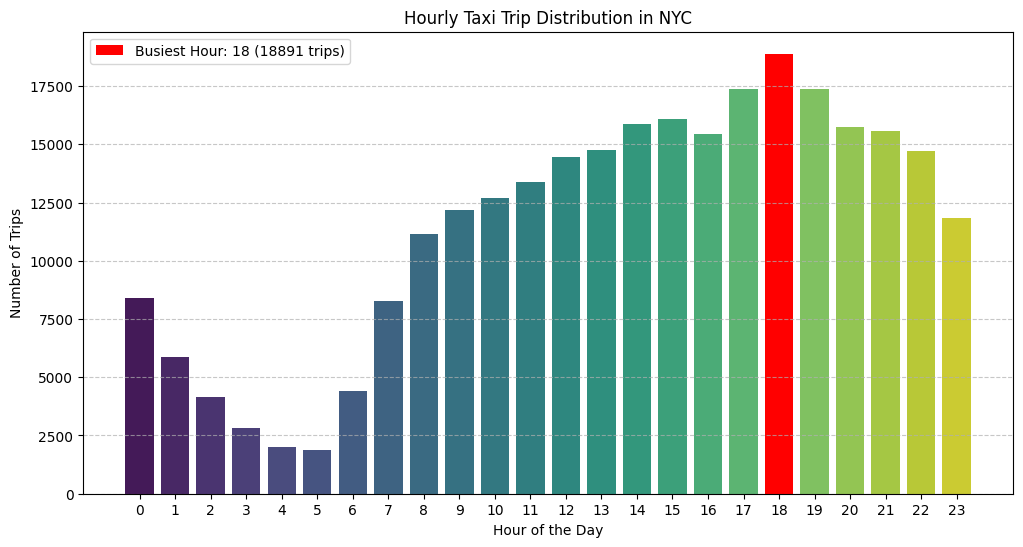

Busiest Hour: 18 with 18891 trips


In [396]:
# Visualise the number of trips per hour and find the busiest hour

# Count trips per hour
hourly_trips = df_merged["pickup_hour"].value_counts().sort_index()

# Find the busiest hour
busiest_hour = hourly_trips.idxmax()
busiest_hour_trips = hourly_trips.max()

# Plot the hourly trips
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trips.index, y=hourly_trips.values, palette="viridis")

# Highlight the busiest hour in red
plt.bar(busiest_hour, busiest_hour_trips, color='red', label=f'Busiest Hour: {busiest_hour} ({busiest_hour_trips} trips)')

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Taxi Trip Distribution in NYC")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


# Display the busiest hour and trips count
print(f"Busiest Hour: {busiest_hour} with {busiest_hour_trips} trips")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [397]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1

# Count trips per hour
hourly_trips = df_merged["pickup_hour"].value_counts().sort_index()

# Scaling up the trip numbers
scaling_factor = 1 / sample_fraction
hourly_trips_scaled = hourly_trips * scaling_factor

# Finding the 5 busiest hours
top_5_busiest_hours = hourly_trips_scaled.nlargest(5)

# Display results
print("Top 5 Busiest Hours (Scaled Up):")
print(top_5_busiest_hours)

Top 5 Busiest Hours (Scaled Up):
pickup_hour
18    188910.0
17    173730.0
19    173600.0
15    161040.0
14    158530.0
Name: count, dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

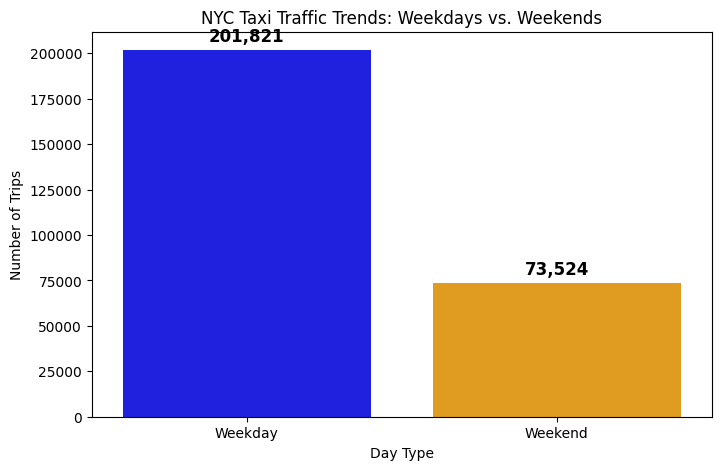

In [398]:
# Compare traffic trends for the week days and weekends

# Extracting day of the week (0 = Monday, 6 = Sunday)
df_merged["day_of_week"] = df_merged["tpep_pickup_datetime"].dt.dayofweek

# Defining weekdays (0-4) and for weekends (5-6)
df_merged["day_type"] = df_merged["day_of_week"].apply(lambda x: "Weekday" if x < 5 else "Weekend")

# Count trips for weekdays and weekends
traffic_trends = df_merged["day_type"].value_counts()

# Plot the comparison usig barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=traffic_trends.index, y=traffic_trends.values, palette=["blue", "orange"])

plt.xlabel("Day Type")
plt.ylabel("Number of Trips")
plt.title("NYC Taxi Traffic Trends: Weekdays vs. Weekends")

# Show the exact count on bars
for i, count in enumerate(traffic_trends.values):
    plt.text(i, count + 5000, f"{count:,}", ha="center", fontsize=12, fontweight="bold")


plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Top 10 Pickup Zones (Hourly):
 PULocationID
237    12215
161    11855
132    11243
236    11080
162     9663
230     9267
186     9056
142     8633
170     8297
138     8206
Name: pickup_hour, dtype: int64

Top 10 Dropoff Zones (Hourly):
 DOLocationID
236    11409
237    11115
161    10909
230     8649
170     8513
162     8056
142     7541
239     7107
234     7059
48      6991
Name: pickup_hour, dtype: int64


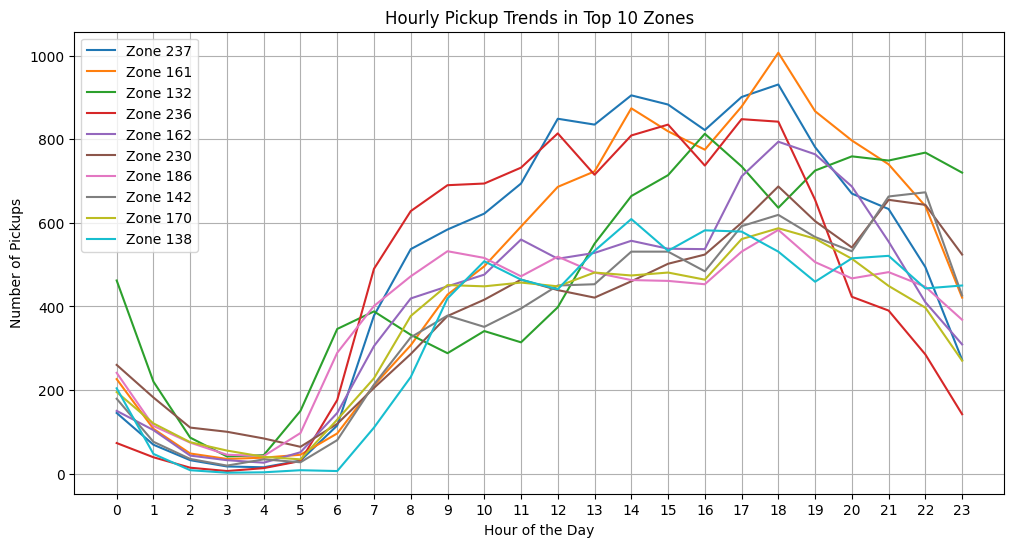

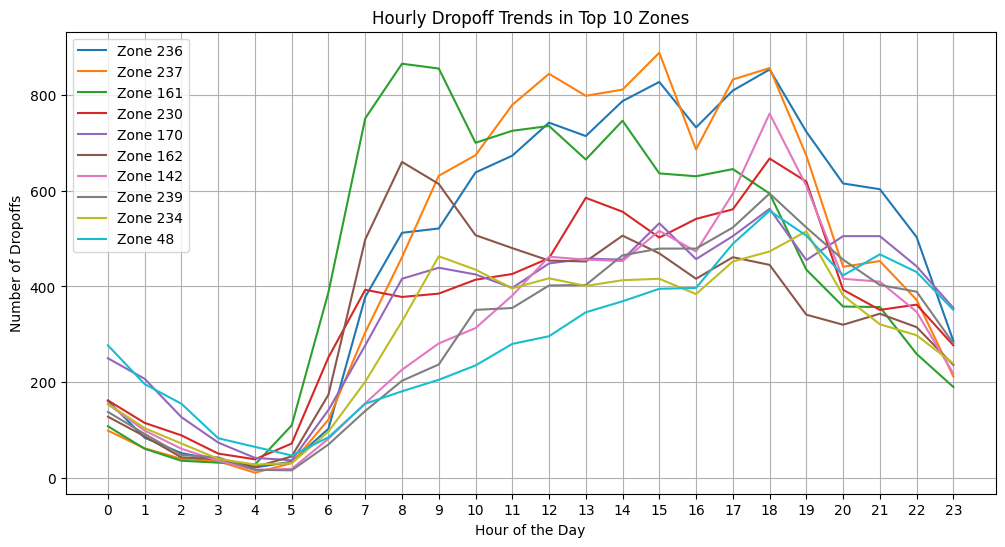

In [399]:
# Find top 10 pickup and dropoff zones

# Finding top 10 pickup zones (by hourly pickups)
top_pickup_zones = df_merged.groupby("PULocationID")["pickup_hour"].count().nlargest(10)

# Finding top 10 dropoff zones (by hourly dropoffs)
top_dropoff_zones = df_merged.groupby("DOLocationID")["pickup_hour"].count().nlargest(10)

# Display the results
print("Top 10 Pickup Zones (Hourly):\n", top_pickup_zones)
print("\nTop 10 Dropoff Zones (Hourly):\n", top_dropoff_zones)

# Plot hourly pickup trends in top 10 pickup zones
plt.figure(figsize=(12, 6))
for zone in top_pickup_zones.index:
    hourly_trend = df_merged[df_merged["PULocationID"] == zone].groupby("pickup_hour")["pickup_hour"].count()
    plt.plot(hourly_trend.index, hourly_trend.values, label=f"Zone {zone}")

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Pickup Trends in Top 10 Zones")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

print("\n")
# Plot hourly dropoff trends in top 10 dropoff zones
plt.figure(figsize=(12, 6))
for zone in top_dropoff_zones.index:
    hourly_trend = df_merged[df_merged["DOLocationID"] == zone].groupby("pickup_hour")["pickup_hour"].count()
    plt.plot(hourly_trend.index, hourly_trend.values, label=f"Zone {zone}")

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Dropoffs")
plt.title("Hourly Dropoff Trends in Top 10 Zones")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [400]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Count pickups and dropoffs per zone
pickup_counts = df_merged["PULocationID"].value_counts()
dropoff_counts = df_merged["DOLocationID"].value_counts()

# Combine into a DataFrame
zone_ratios = pd.DataFrame({
    "pickups": pickup_counts,
    "dropoffs": dropoff_counts
}).fillna(0)  # Fill NaN values with 0

# Avoid division by zero
zone_ratios["pickup_drop_ratio"] = zone_ratios["pickups"] / zone_ratios["dropoffs"].replace(0, 1)

# Sort by ratio
highest_ratios = zone_ratios.sort_values(by="pickup_drop_ratio", ascending=False).head(10)
lowest_ratios = zone_ratios.sort_values(by="pickup_drop_ratio", ascending=True).head(10)

# Display results
display("Top 10 Zones with Highest Pickup/Dropoff Ratios:", highest_ratios)
display("Top 10 Zones with Lowest Pickup/Dropoff Ratios:", lowest_ratios)


'Top 10 Zones with Highest Pickup/Dropoff Ratios:'

pickups  dropoffs  pickup_drop_ratio
70     959.0       157           6.108280
132  11243.0      2747           4.092829
138   8206.0      3359           2.442989
105      2.0         1           2.000000
186   9056.0      6274           1.443417
114   3803.0      2902           1.310476
249   6144.0      4856           1.265239
43    4261.0      3518           1.211200
90    4840.0      4017           1.204879
162   9663.0      8056           1.199479

'Top 10 Zones with Lowest Pickup/Dropoff Ratios:'

pickups  dropoffs  pickup_drop_ratio
115      0.0         2                0.0
204      0.0         1                0.0
27       0.0         7                0.0
109      0.0         2                0.0
30       0.0         3                0.0
46       0.0         6                0.0
176      0.0         2                0.0
221      0.0         4                0.0
57       0.0         6                0.0
58       0.0         9                0.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [401]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filtering data for nighttime (11 PM to 5 AM)
night_hours = df_merged[(df_merged["pickup_hour"] >= 23) | (df_merged["pickup_hour"] <= 5)]

# Count nighttime pickups and dropoffs
night_pickup_counts = night_hours["PULocationID"].value_counts().head(10)
night_dropoff_counts = night_hours["DOLocationID"].value_counts().head(10)

# Display results
display("Top 10 Nighttime Pickup Zones:", night_pickup_counts)
display("Top 10 Nighttime Dropoff Zones:", night_dropoff_counts)

'Top 10 Nighttime Pickup Zones:'

PULocationID
79     2649
249    1845
132    1723
148    1685
48     1644
114    1357
230    1324
234    1093
107    1050
68     1045
Name: count, dtype: int64

'Top 10 Nighttime Dropoff Zones:'

DOLocationID
79     1489
48     1174
170    1092
68      965
107     939
263     835
141     806
230     805
249     800
148     746
Name: count, dtype: int64

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [402]:
# Filter for night hours (11 PM to 5 AM)

# Defining night and day hours
night_hours = df[(df["pickup_hour"] >= 23) | (df["pickup_hour"] <= 5)]
day_hours = df[(df["pickup_hour"] >= 6) & (df["pickup_hour"] <= 22)]

# Calculate total revenue for night and day
night_revenue = night_hours["total_amount"].sum()
day_revenue = day_hours["total_amount"].sum()

# Calculate revenue share percentage
total_revenue = night_revenue + day_revenue
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

# Display results
print(f"Nighttime Revenue: ${night_revenue:.2f} ({night_share:.2f}%)")
print(f"Daytime Revenue: ${day_revenue:.2f} ({day_share:.2f}%)")

Nighttime Revenue: $922553.16 (13.45%)
Daytime Revenue: $5938859.27 (86.55%)


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [403]:
# Analyse the fare per mile per passenger for different passenger counts

# Ensuring values does not have 0 as count to avoid errors
df_merged_new = df_merged[(df_merged["trip_distance"] > 0) & (df_merged["passenger_count"] > 0)]

# Calculate fare per mile
df_merged_new["fare_per_mile"] = df_merged_new["fare_amount"] / df_merged_new["trip_distance"]

# Calculate fare per mile per passenger
df_merged_new["fare_per_mile_per_passenger"] = df_merged_new["fare_per_mile"] / df_merged_new["passenger_count"]

# Group by passenger count and find the average fare per mile per passenger
fare_per_mile_passenger = df_merged_new.groupby("passenger_count")["fare_per_mile_per_passenger"].mean().round(2)

# Display results
display(fare_per_mile_passenger)


passenger_count
1.0    10.02
2.0     6.02
3.0     4.03
4.0     2.78
5.0     1.34
6.0     1.32
Name: fare_per_mile_per_passenger, dtype: float64

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

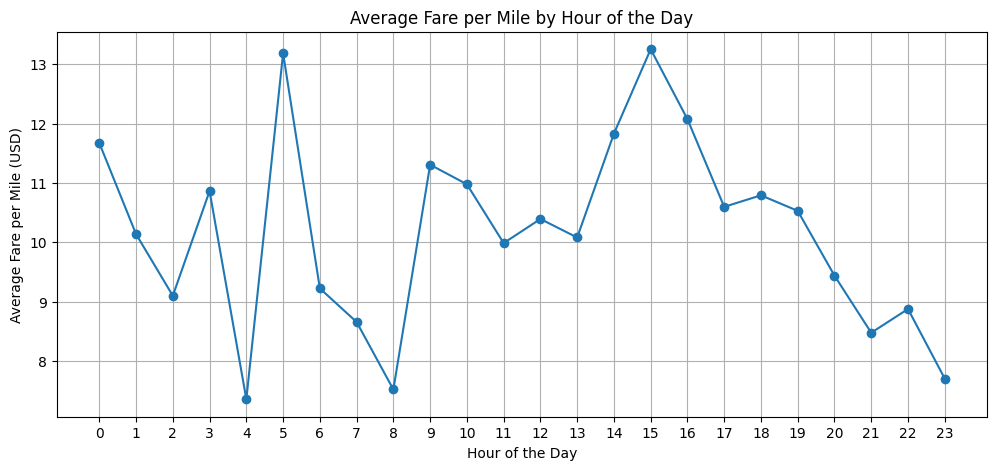

/n


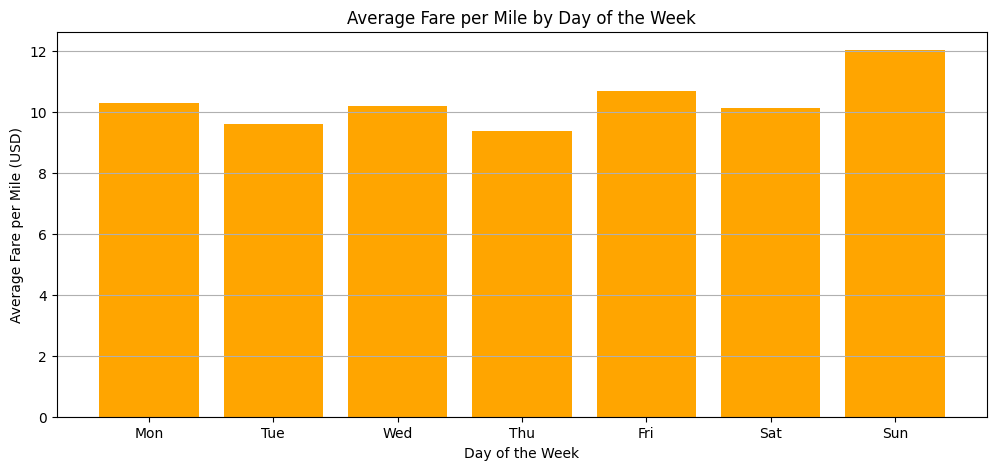

In [404]:
# Compare the average fare per mile for different days and for different times of the day

# Computing average fare per mile for each hour
hourly_fare_per_mile = df_merged_new.groupby('pickup_hour').apply(
    lambda x: (x['fare_amount'] / x['trip_distance']).mean()
)

# Computiing average fare per mile for each day of the week
daily_fare_per_mile = df_merged_new.groupby('day_of_week').apply(
    lambda x: (x['fare_amount'] / x['trip_distance']).mean()
)

# Plot hourly trend
plt.figure(figsize=(12, 5))
plt.plot(hourly_fare_per_mile.index, hourly_fare_per_mile.values, marker='o', linestyle='-')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Average Fare per Mile by Hour of the Day")
plt.xticks(range(24))
plt.grid(True)
plt.show()


print("/n")

# Plot daily trend
plt.figure(figsize=(12, 5))
plt.bar(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], daily_fare_per_mile.values, color='orange')
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Average Fare per Mile by Day of the Week")
plt.grid(axis='y')
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

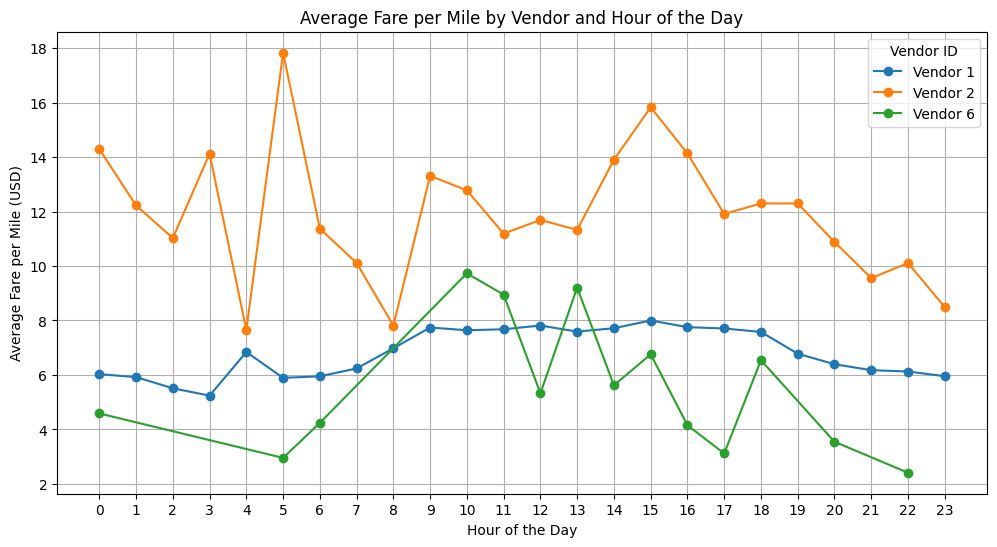

In [405]:
# Compare fare per mile for different vendors

vendor_hourly_fare_per_mile = df_merged_new.groupby(['VendorID', 'pickup_hour']).apply(
    lambda x: (x['fare_amount'] / x['trip_distance']).mean()
).reset_index(name='avg_fare_per_mile')

# Plot the trends
plt.figure(figsize=(12, 6))

# Plot for each VendorID
for vendor in df_merged_new['VendorID'].unique():
    vendor_data = vendor_hourly_fare_per_mile[vendor_hourly_fare_per_mile['VendorID'] == vendor]
    plt.plot(vendor_data['pickup_hour'], vendor_data['avg_fare_per_mile'], marker='o', linestyle='-', label=f'Vendor {vendor}')

plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Average Fare per Mile by Vendor and Hour of the Day")
plt.xticks(range(24))
plt.legend(title="Vendor ID")
plt.grid(True)
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


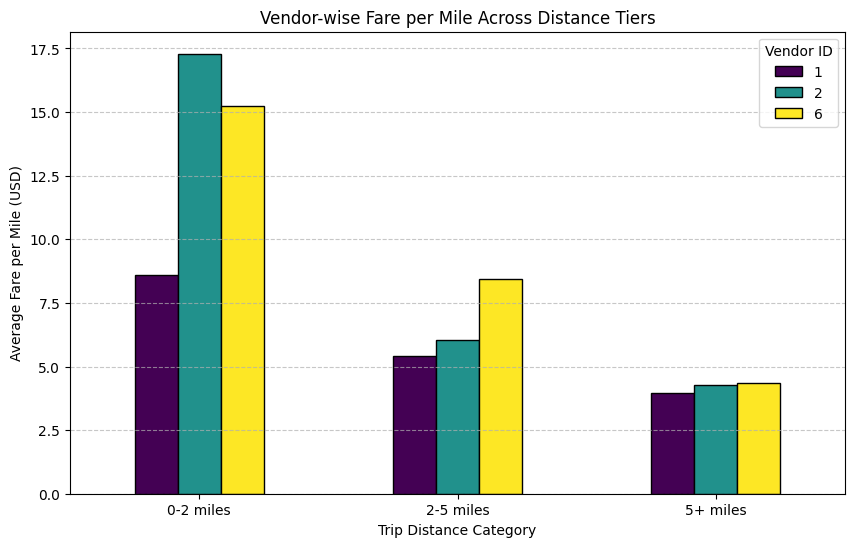

In [406]:
# Defining distance tiers

bins = [0, 2, 5, float('inf')]
labels = ["0-2 miles", "2-5 miles", "5+ miles"]

# Create a new column for distance categories
df_merged_new['distance_category'] = pd.cut(df_merged_new['trip_distance'], bins=bins, labels=labels)

# Computing average fare per mile for each vendor and distance category
vendor_fare_per_mile = df_merged_new.groupby(['VendorID', 'distance_category']).apply(
    lambda x: (x['fare_amount'] / x['trip_distance']).mean()
).reset_index(name='avg_fare_per_mile')

# Pivoting the data for better visualization
pivot_table = vendor_fare_per_mile.pivot(index="distance_category", columns="VendorID", values="avg_fare_per_mile")

# Plot the results
pivot_table.plot(kind='bar', figsize=(10, 6), colormap="viridis", edgecolor="black")

plt.xlabel("Trip Distance Category")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Vendor-wise Fare per Mile Across Distance Tiers")
plt.xticks(rotation=0)
plt.legend(title="Vendor ID")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

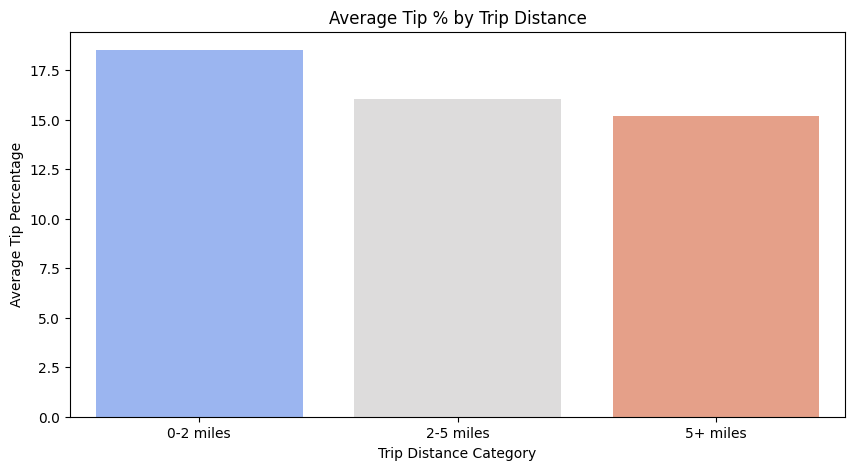

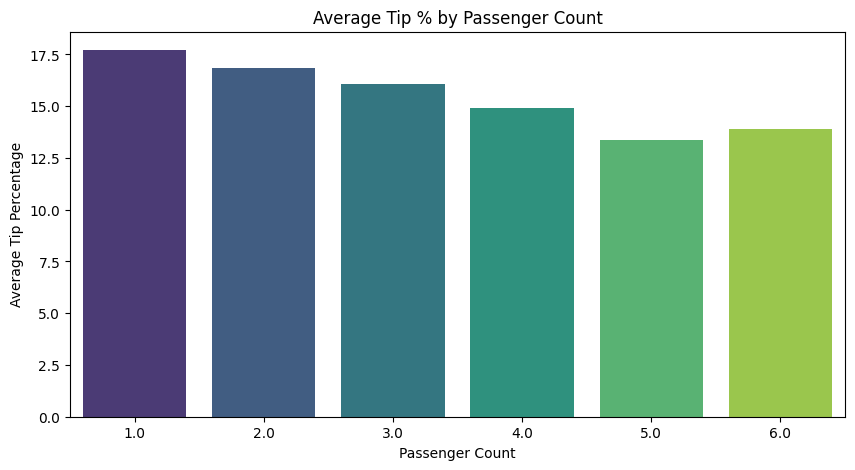

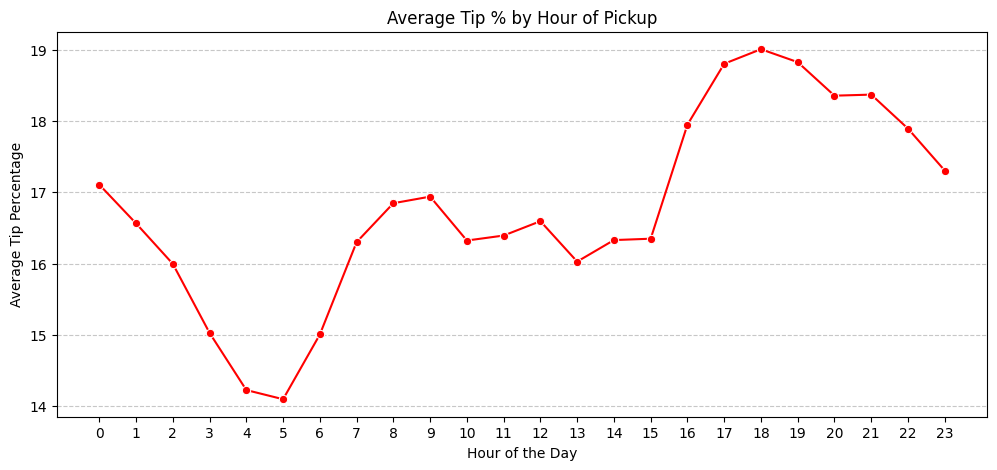

In [407]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage
df_merged_new['tip_percentage'] = (df_merged_new['tip_amount'] / df_merged_new['fare_amount']) * 100

# Define trip distance categories
bins = [0, 2, 5, float('inf')]
labels = ["0-2 miles", "2-5 miles", "5+ miles"]
df_merged_new['distance_category'] = pd.cut(df_merged_new['trip_distance'], bins=bins, labels=labels)

# Group by distance category and calculate average tip percentage
tip_by_distance = df_merged_new.groupby("distance_category")['tip_percentage'].mean()

# Group by passenger count and calculate average tip percentage
tip_by_passenger = df_merged_new.groupby("passenger_count")['tip_percentage'].mean()

# Extracting hour of pickup
df_merged_new['pickup_hour'] = pd.to_datetime(df_merged_new['tpep_pickup_datetime']).dt.hour

# Group by pickup hour and calculate average tip percentage
tip_by_hour = df_merged_new.groupby("pickup_hour")['tip_percentage'].mean()

# Plot Tip % by Distance
plt.figure(figsize=(10, 5))
sns.barplot(x=tip_by_distance.index, y=tip_by_distance.values, palette="coolwarm")
plt.xlabel("Trip Distance Category")
plt.ylabel("Average Tip Percentage")
plt.title("Average Tip % by Trip Distance")
plt.show()

print('\n')

# Plot Tip % by Passenger Count
plt.figure(figsize=(10, 5))
sns.barplot(x=tip_by_passenger.index, y=tip_by_passenger.values, palette="viridis")
plt.xlabel("Passenger Count")
plt.ylabel("Average Tip Percentage")
plt.title("Average Tip % by Passenger Count")
plt.show()

print('\n')

# Plot Tip % by Pickup Hour
plt.figure(figsize=(12, 5))
sns.lineplot(x=tip_by_hour.index, y=tip_by_hour.values, marker="o", color="red")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Tip Percentage")
plt.title("Average Tip % by Hour of Pickup")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

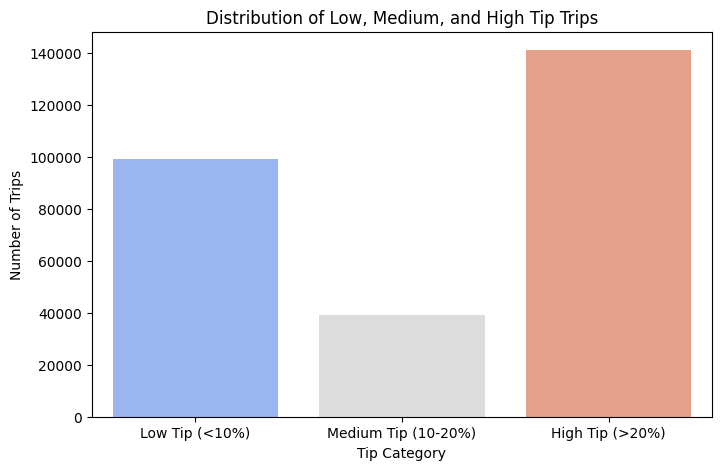

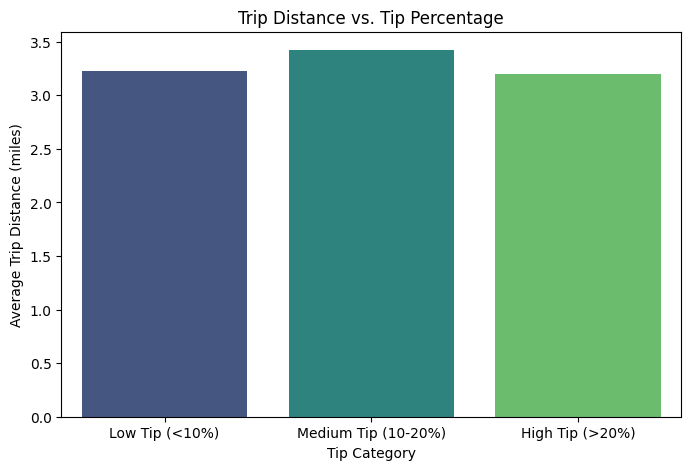

<Figure size 1200x500 with 0 Axes>

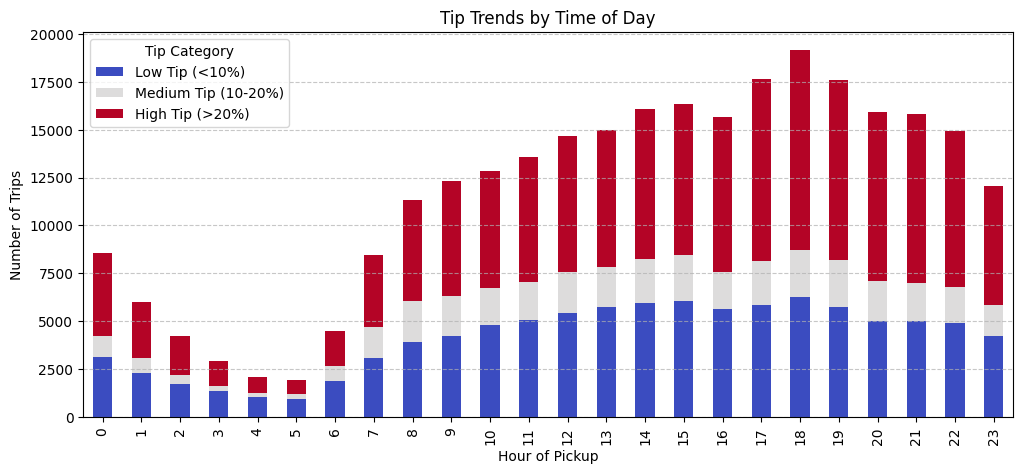

<Figure size 800x500 with 0 Axes>

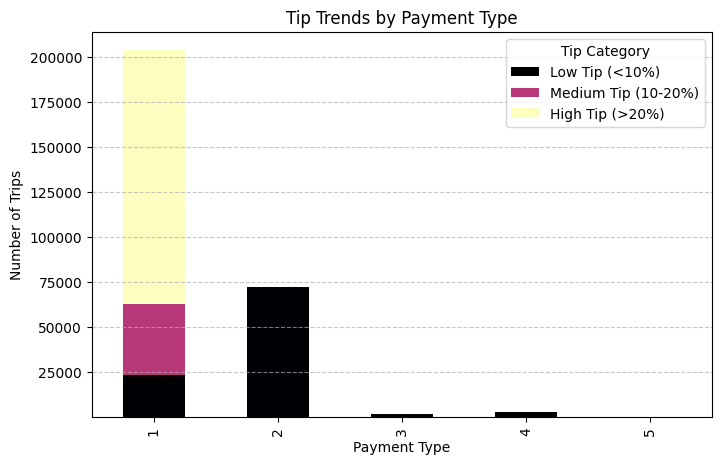

In [408]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remove rows where fare_amount is zero to avoid division errors
df_filtered = df[df['fare_amount'] > 0].copy()

# Calculate tip percentage
df_filtered['tip_percentage'] = (df_filtered['tip_amount'] / df_filtered['fare_amount']) * 100

# Define Low Tip (<10%) and High Tip (>20%) categories
df_filtered['tip_category'] = pd.cut(df_filtered['tip_percentage'], bins=[-1, 10, 20, 100],
                                     labels=["Low Tip (<10%)", "Medium Tip (10-20%)", "High Tip (>20%)"])

# Count the number of trips in each category
tip_counts = df_filtered['tip_category'].value_counts()

# Plot Tip Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=tip_counts.index, y=tip_counts.values, palette="coolwarm")
plt.xlabel("Tip Category")
plt.ylabel("Number of Trips")
plt.title("Distribution of Low, Medium, and High Tip Trips")
plt.show()

# Compare Average Trip Distance for Low vs. High Tips
tip_distance = df_filtered.groupby("tip_category")['trip_distance'].mean()

print('\n')

plt.figure(figsize=(8, 5))
sns.barplot(x=tip_distance.index, y=tip_distance.values, palette="viridis")
plt.xlabel("Tip Category")
plt.ylabel("Average Trip Distance (miles)")
plt.title("Trip Distance vs. Tip Percentage")
plt.show()

# Compare Time of Day Impact on Tips
df_filtered['pickup_hour'] = pd.to_datetime(df_filtered['tpep_pickup_datetime']).dt.hour
tip_hourly = df_filtered.groupby(['pickup_hour', 'tip_category'])['tip_percentage'].count().unstack()

print('\n')

plt.figure(figsize=(12, 5))
tip_hourly.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(12, 5))
plt.xlabel("Hour of Pickup")
plt.ylabel("Number of Trips")
plt.title("Tip Trends by Time of Day")
plt.legend(title="Tip Category")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

print('\n')

# Compare Payment Type Impact on Tips
tip_payment = df_filtered.groupby(['payment_type', 'tip_category'])['tip_percentage'].count().unstack()

plt.figure(figsize=(8, 5))
tip_payment.plot(kind="bar", stacked=True, colormap="magma", figsize=(8, 5))
plt.xlabel("Payment Type")
plt.ylabel("Number of Trips")
plt.title("Tip Trends by Payment Type")
plt.legend(title="Tip Category")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

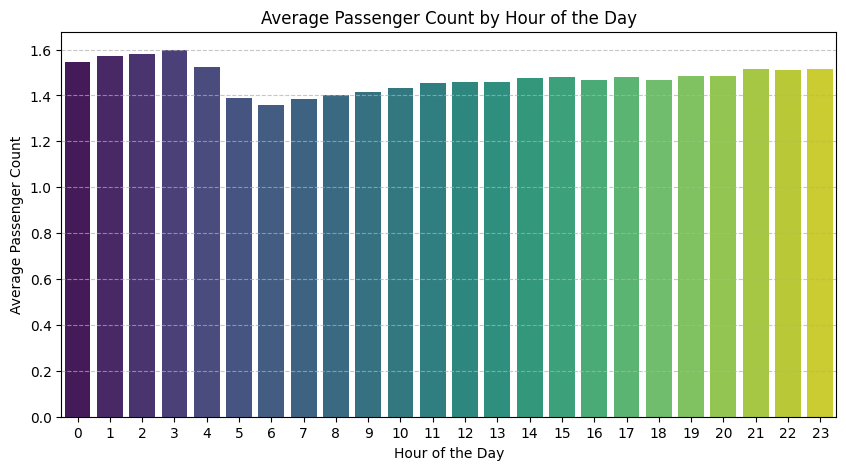

In [409]:
# See how passenger count varies across hours and days

# Maping numbers to weekday name using dictionary to perform mapping in one line
day_map = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
           4: "Friday", 5: "Saturday", 6: "Sunday"}
df_merged_new['pickup_day'] = df_merged_new['pickup_day'].map(day_map)

# Average Passenger Count by Hour of the Day
hourly_passenger_count = df_merged_new.groupby("pickup_hour")["passenger_count"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_passenger_count.index, y=hourly_passenger_count.values, palette="viridis")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.title("Average Passenger Count by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

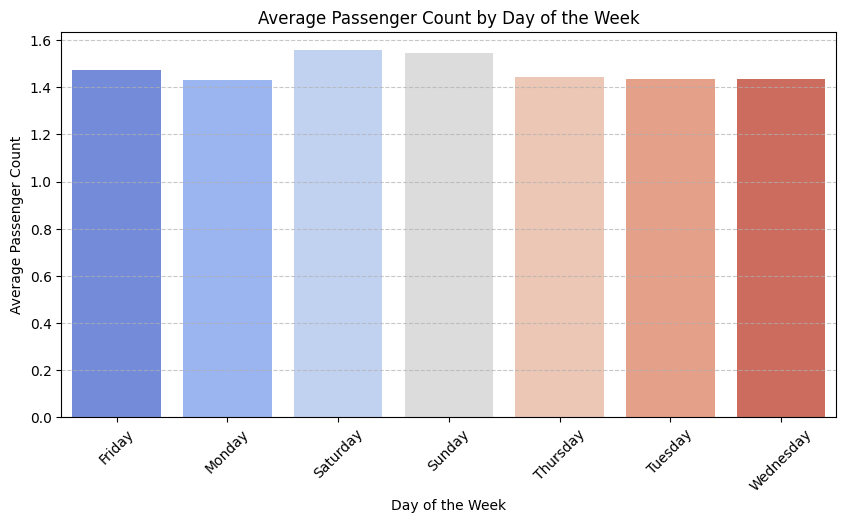

In [410]:
# Average Passenger Count by Day of the Week
daily_passenger_count = df_merged_new.groupby("pickup_day")["passenger_count"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=daily_passenger_count.index, y=daily_passenger_count.values, palette="coolwarm")
plt.xlabel("Day of the Week")
plt.ylabel("Average Passenger Count")
plt.title("Average Passenger Count by Day of the Week")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [411]:
# How does passenger count vary across zones

zone_passenger_count = df_merged.groupby("zone")["passenger_count"].mean().sort_values(ascending=False)

display(zone_passenger_count)

zone
Bronx Park                       3.000000
Westchester Village/Unionport    2.538462
Prospect Park                    2.400000
Crotona Park East                2.166667
Homecrest                        2.000000
                                   ...   
Oakland Gardens                  1.000000
North Corona                     1.000000
Murray Hill-Queens               1.000000
Douglaston                       1.000000
Allerton/Pelham Gardens          1.000000
Name: passenger_count, Length: 235, dtype: float64

In [412]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Calculate the average passenger count per pickup zone
avg_passenger_count_per_zone = df_filtered.groupby("PULocationID")["passenger_count"].mean().reset_index()

# Renaming column
avg_passenger_count_per_zone.rename(columns={"passenger_count": "avg_passenger_count"}, inplace=True)

# Merge with GeoDataFrame zones_with_trips using LocationID
zones_with_trips = zones.merge(avg_passenger_count_per_zone, left_on="LocationID", right_on="PULocationID", how="left")

# Fill NaN values with 0 (in case some zones have no trips)
zones_with_trips["avg_passenger_count"].fillna(0, inplace=True)

# Display the first few rows
display(zones_with_trips[["zone", "avg_passenger_count"]].head())


zone  avg_passenger_count
0           Newark Airport             1.428571
1              Jamaica Bay             0.000000
2  Allerton/Pelham Gardens             1.000000
3            Alphabet City             1.529175
4            Arden Heights             1.000000

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [413]:
df_merged_new.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_hour',
       'pickup_day', 'pickup_month', 'trip_duration', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry',
       'day_of_week', 'day_type', 'fare_per_mile',
       'fare_per_mile_per_passenger', 'distance_category', 'tip_percentage'],
      dtype='object')

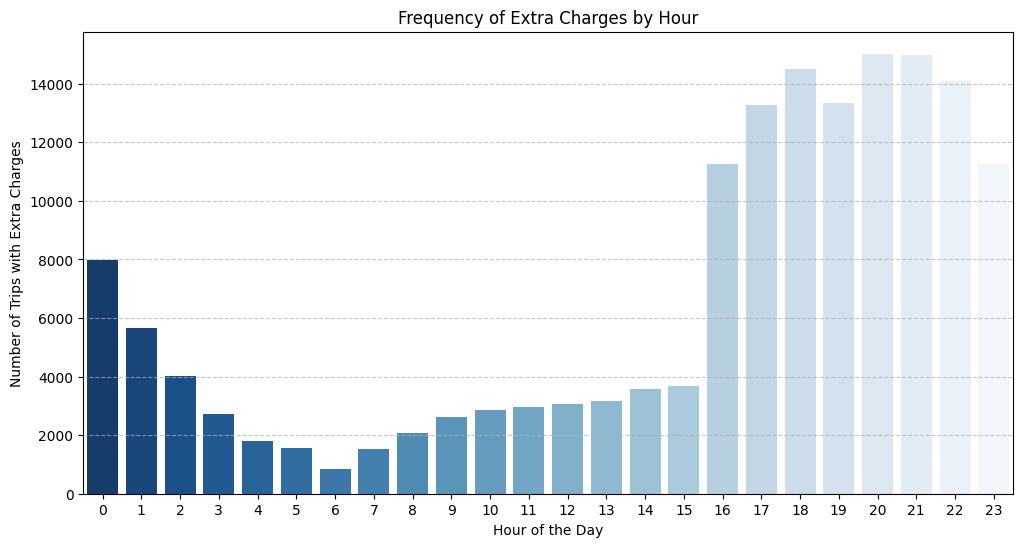

In [414]:
# How often is each surcharge applied?
extra_charges_df = df_merged_new[df_merged_new["extra"] > 0]

# Analyze extra charge frequency by pickup zone
pickup_extra = extra_charges_df.groupby("PULocationID").size().reset_index(name="extra_charge_count")
pickup_extra = pickup_extra.sort_values(by="extra_charge_count", ascending=False)

# Analyze extra charge frequency by dropoff zone
dropoff_extra = extra_charges_df.groupby("DOLocationID").size().reset_index(name="extra_charge_count")
dropoff_extra = dropoff_extra.sort_values(by="extra_charge_count", ascending=False)

# Analyze extra charge frequency by hour of the day
extra_charges_df["pickup_hour"] = extra_charges_df["tpep_pickup_datetime"].dt.hour
extra_by_hour = extra_charges_df.groupby("pickup_hour").size().reset_index(name="extra_charge_count")

# Plot extra charge frequency by hour
plt.figure(figsize=(12, 6))
sns.barplot(x=extra_by_hour["pickup_hour"], y=extra_by_hour["extra_charge_count"], palette="Blues_r")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips with Extra Charges")
plt.title("Frequency of Extra Charges by Hour")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [415]:
"""
Based on my understanding and analysis some of the recommendations for Optimizing Routing and Dispatching

1. Optimize Supply During Peak Hours:

 - Increase taxi availability from 5 PM to 8 PM and late-night hours to match demand since people tend to take taxi trips to travel more.

 - Deploy more taxis on Fridays and weekends in high-demand zones such as business districts and nightlife hubs.

2. Reduce Route Inefficiencies:

 - Identify slow routes during peak hours and suggest alternative pathways to minimize delays.

 - Offer dynamic pricing or discounts for trips starting from congested areas to encourage more even distribution of demand.

3 . Improve Airport Pickup Efficiency:

 - Streamline pickup processes at JFK and LaGuardia by allocating designated taxi waiting zones based on demand.

 - Offer pre-booked taxi services for passengers to minimize waiting times.

4. Nighttime Strategy for Maximizing Revenue:

 - Increase fleet availability near entertainment and nightlife districts.

 - Ensure pricing policies align with nighttime surcharges to optimize driver earnings and passenger affordability.  """

'\nBased on my understanding and analysis some of the recommendations for Optimizing Routing and Dispatching\n\n1. Optimize Supply During Peak Hours:\n\n - Increase taxi availability from 5 PM to 8 PM and late-night hours to match demand since people tend to take taxi trips to travel more.\n\n - Deploy more taxis on Fridays and weekends in high-demand zones such as business districts and nightlife hubs.\n\n2. Reduce Route Inefficiencies:\n\n - Identify slow routes during peak hours and suggest alternative pathways to minimize delays.\n\n - Offer dynamic pricing or discounts for trips starting from congested areas to encourage more even distribution of demand.\n\n3 . Improve Airport Pickup Efficiency:\n\n - Streamline pickup processes at JFK and LaGuardia by allocating designated taxi waiting zones based on demand.\n\n - Offer pre-booked taxi services for passengers to minimize waiting times.\n\n4. Nighttime Strategy for Maximizing Revenue:\n\n - Increase fleet availability near enterta

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [416]:
"""
Some strategic suggestions for positioning cabs across different zones based on trip trends as seen above are:

1. Busy Business Areas & Peak Hours

 - Position more taxis in Midtown Manhattan, Wall Street, and Downtown Brooklyn during 7 AM - 10 AM & 5 PM - 8 PM to serve office commuters.
 - Keep taxis available at train and subway stations for short-distance travel.
 - At night, focus on nightlife areas where demand rises after 11 PM.

2.Airports & Tourist Spots

  - Keep taxis ready at JFK and LaGuardia airports, especially in the early mornings (4 AM - 8 AM) and evenings (6 PM - 10 PM) when many flights arrive.
  - Use a rotation system to avoid long waiting times for drivers.
  - Position taxis near popular tourist sites like Times Square and Central Park during the day.

3. Weekday vs. Weekend Strategies

 - Weekdays: Focus on financial districts and business areas during office hours.
 - Weekends: Place more taxis near shopping areas and parks where people go out for leisure.

4. Nighttime Demand (11 PM - 5 AM):

 - Increase taxis near bars and clubs in East Village, Meatpacking District, and Williamsburg, as data shows high late-night pickups in these areas.
 - Ensure availability near transport hubs for late-night travelers catching last trains or buses.
 - Balancing Pickup & Dropoff Zones:
 - Some areas have more drop-offs than pickups (e.g., residential areas). To balance this, encourage drivers to wait near outskirts of high-dropoff zones where return trips are likely.

5. Real-time Taxi Redistribution:
  - Use real-time tracking to move taxis to high-demand areas as needed.
  - If some zones have too many taxis waiting, shift them to nearby busy areas.
  - Adjust cab distribution based on live trip requests.

"""

'\nSome strategic suggestions for positioning cabs across different zones based on trip trends as seen above are:\n\n1. Busy Business Areas & Peak Hours\n\n - Position more taxis in Midtown Manhattan, Wall Street, and Downtown Brooklyn during 7 AM - 10 AM & 5 PM - 8 PM to serve office commuters.\n - Keep taxis available at train and subway stations for short-distance travel.\n - At night, focus on nightlife areas where demand rises after 11 PM.\n\n2.Airports & Tourist Spots\n\n  - Keep taxis ready at JFK and LaGuardia airports, especially in the early mornings (4 AM - 8 AM) and evenings (6 PM - 10 PM) when many flights arrive.\n  - Use a rotation system to avoid long waiting times for drivers.\n  - Position taxis near popular tourist sites like Times Square and Central Park during the day.\n  \n3. Weekday vs. Weekend Strategies\n\n - Weekdays: Focus on financial districts and business areas during office hours.\n - Weekends: Place more taxis near shopping areas and parks where people g

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [417]:
"""
Some of the suggestions would be : -
1. Implement Surge Pricing During Peak Demand
 Insight from Data: Peak demand occurs during rush hours (7 AM - 10 AM & 5 PM - 8 PM) and late-night hours (11 PM - 2 AM).

  Pricing Strategy suggested:

  - Increase base fare by 10-20% during weekday rush hours when demand is high.
  - Apply higher surge pricing (20-30%) on Friday and Saturday nights near nightlife areas (Meatpacking District, East Village, Williamsburg).
  - Keep airport surcharges dynamic, increasing fares during peak flight arrival hours (4 AM - 8 AM and 6 PM - 10 PM).

2. Tiered Fare Structure Based on Trip Distance
  Insight from Data: Short trips have higher fare per mile, while longer trips have lower fare per mile due to flat rates.

  Pricing Strategy suggested:

  - For short trips (<2 miles): Increase per-mile pricing slightly (e.g., $3.50/mile instead of $3.00) to offset high demand.
  - For medium trips (2-5 miles): Keep standard pricing but introduce incentives (discounts for repeat users).
  - For long trips (>5 miles): Offer slightly reduced per-mile pricing to encourage long-distance travel while maintaining profitability.

3. Time-Based Discounts to Fill Low-Demand Periods
  Insight from Data: Lower demand observed in midday hours (10 AM - 3 PM) and early morning (5 AM - 7 AM).

  Pricing Strategy suggested:

  - Offer 5-10% fare discounts during low-demand hours to encourage ridership.
  - Provide promotions for return trips in residential areas where pickups are lower than drop-offs.
  - Use loyalty programs (discount on every 5th ride) to retain passengers during slower hours.

4. Vendor-Specific Pricing Differentiation
  Insight from Data: Different vendors show varying average fare per mile trends.

  Pricing Strategy suggested:

  - If one vendor offers lower fares for short rides, introduce competitive rates for longer trips to differentiate.
  - Use fare transparency (showing estimated cost before booking) to attract riders hesitant about high fares.
  - Encourage pre-booked rides with locked-in rates to guarantee trips for vendors with fluctuating demand.


5. Higher Fare for High-Service Rides
  Insight from Data: Passengers traveling in groups or with luggage (e.g., airport rides) are willing to pay extra.

  Pricing Strategy Suggested:

  - Charge higher base fare for SUVs or premium taxis.
  - Introduce extra fee for large passenger groups (4+ people).
  - Offer flat-rate premium rides for corporate users or business districts.

"""

'\nSome of the suggestions would be : -\n1. Implement Surge Pricing During Peak Demand\n Insight from Data: Peak demand occurs during rush hours (7 AM - 10 AM & 5 PM - 8 PM) and late-night hours (11 PM - 2 AM).\n\n  Pricing Strategy suggested:\n\n  - Increase base fare by 10-20% during weekday rush hours when demand is high.\n  - Apply higher surge pricing (20-30%) on Friday and Saturday nights near nightlife areas (Meatpacking District, East Village, Williamsburg). \n  - Keep airport surcharges dynamic, increasing fares during peak flight arrival hours (4 AM - 8 AM and 6 PM - 10 PM).\n\n2. Tiered Fare Structure Based on Trip Distance\n  Insight from Data: Short trips have higher fare per mile, while longer trips have lower fare per mile due to flat rates.\n\n  Pricing Strategy suggested:\n\n  - For short trips (<2 miles): Increase per-mile pricing slightly (e.g., $3.50/mile instead of $3.00) to offset high demand.\n  - For medium trips (2-5 miles): Keep standard pricing but introduce 